In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def flat_u(j):
    """produces a flat line at zero"""
    y = 0
    return y

def h_spike(j, midpoint):
    """produces a curve which is zero everywhere but h = 1 at one point in the cente"""
    if j == midpoint:
        y = 1
    else:
        y = 0
    return y

def h_cosbell(j):
    """produces a curve which has a bump in the centre and is surrounded by zero either side"""
    if 0.25 <= j <= 0.75:
        y = math.cos(2*(math.pi)*(j - 0.5))
    else:
        y = 0
    return y

In [3]:
def initialconditions_spike(nx, nt, plot = True):
    """
    nx: number of space steps
    nt: number of time steps
    plot: if this variable is True then the initial conditions will be plotted, but it False then no plot will be produced
    """
    x = np.linspace(0,1,nx+1) # want the extra point at the boundary for plot but in reality h[0] and h[nx] are equal
    midpoint = math.floor(math.floor(len(x)/2)/2)*2 
    
    # initialize initial u and initial h
    initialu = np.zeros(len(x)).astype(float)
    initialh = np.zeros(len(x)).astype(float)
    
    # set the initial conditions such that u is zero everywhere and h is zero everywhere apart from one point at the centre where it is one
    for i in range(len(x)):
        initialu[i] = flat_u(i)
        initialh[i] = h_spike(i, midpoint)
    
    # plot these initial conditions
    if plot == True:
        plt.clf()
        plt.ion()
        plt.plot(x, initialu, label = 'Initial u conditions')
        plt.plot(x, initialh, label = 'Initial h conditions')
        plt.legend(loc = 'best')
        plt.show()
        
    return initialu, initialh, midpoint, x

def initialconditions_cosbell(nx, nt, plot = True):
    """
    nx: number of space steps
    nt: number of time steps
    plot: if this variable is True then the initial conditions will be plotted, but it False then no plot will be produced
    """
    x = np.linspace(0,1,nx+1) # want the extra point at the boundary but in reality h[0] and h[nx] are equal
    
    midpoint = math.floor(math.floor(len(x)/2)/2)*2 # calculate midpoint to be used for the forcing term
    
    # initialize initial u and initial h
    initialu = np.zeros(len(x)).astype(float)
    initialh = np.zeros(len(x)).astype(float)
    
    # set the initial conditions such that u is zero everywhere and h has a bump in the centre and is surrounded by zero either side
    for i in range(len(x)):
        initialu[i] = flat_u(i)
        initialh[i] = h_cosbell(x[i])
        
    # plot these initial conditions
    if plot == True:
        plt.clf()
        plt.ion()
        plt.plot(x, initialu, label = 'Initial u conditions')
        plt.plot(x, initialh, label = 'Initial h conditions')
        plt.legend(loc = 'best')
        plt.show()
    return initialu, initialh, midpoint, x

In [ ]:
nx = 20
nt = 50

#initialu, initialh, midpoint, x = initialconditions_cosbell(nx, nt)
initialu, initialh, midpoint, x = initialconditions_spike(nx, nt)

In [ ]:
uOld = initialu.copy()
hOld = initialh.copy()

In [ ]:
c = 0.1
g = 1
H = 1

uvector = np.zeros_like(uOld)

matrix = np.zeros((nx+1,nx+1))
    
for i in range(nx+1):    
    matrix[i,i] = 1 + c**2/2
    matrix[i, (i-2)%nx] = -(c**2)/4
    matrix[i, (i+2)%nx] = -(c**2)/4
    
for it in range(nt):    
    for i in range(nx+1):
        uvector[i] = math.sqrt(H/g)*(c/2)*(uOld[(i+1)%nx] - uOld[(i-1)%nx])
    h = np.linalg.solve(matrix, hOld - uvector)
    
    
    hvector = np.zeros_like(hOld)
    for i in range(nx+1):
        hvector[i] = math.sqrt(g/H)*(c/2)*(hOld[(i+1)%nx] - hOld[(i-1)%nx])

    u = np.linalg.solve(matrix, uOld - hvector)
    
    hOld = h.copy()
    uOld = u.copy()
    
#uvector[0] = math.sqrt(H/g)*(c/2)*(uOld[1]-uOld[nx-1])
#uvector[1] = math.sqrt(H/g)*(c/2)*(uOld[2]-uOld[0])
#uvector[nx-1] = math.sqrt(H/g)*(c/2)*(uOld[nx]-uOld[nx-2])
#uvector[nx] = math.sqrt(H/g)*(c/2)*(uOld[1] - uOld[nx - 1])
    
#matrix[0,0] = 1 + (c**2)/2
#matrix[0,2] = -(c**2)/4
#matrix[0, nx -2] = -(c**2)/4
#matrix[1,1] = 1 + (c**2)/2
#matrix[1,3] = -(c**2)/4
#matrix[1,nx-1] = -(c**2)/4
#matrix[nx-1, nx-1] = 1 + (c**2)/2
#matrix[nx-1, 1] = -(c**2)/4
#matrix[nx-1, nx-3] = 1 + (c**2)/2
#matrix[nx, nx] = 1 + (c**2)/2
#matrix[nx, nx - 2] = -(c**2)/4
#matrix[nx, 2] = -(c**2)/4


In [ ]:
plt.clf()
plt.ion()
plt.plot(x, u, label = 'u')
plt.plot(x, h, label = 'h')
plt.legend(loc = 'best')
plt.show()

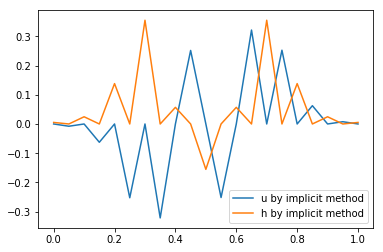

In [5]:
nx = 20
nt = 50

def implicit_method(initialconditions, nx, nt, H = 1, g = 1, c = 0.1):
    initialu, initialh, midpoint, x = initialconditions(nx, nt, plot = False)
    uOld = initialu.copy()
    hOld = initialh.copy()
    uvector = np.zeros_like(uOld)

    matrix = np.zeros((nx+1,nx+1))
    
    for i in range(nx+1):    
        matrix[i,i] = 1 + c**2/2
        matrix[i, (i-2)%nx] = -(c**2)/4
        matrix[i, (i+2)%nx] = -(c**2)/4
    
    for it in range(nt):    
        for i in range(nx+1):
            uvector[i] = math.sqrt(H/g)*(c/2)*(uOld[(i+1)%nx] - uOld[(i-1)%nx])
        h = np.linalg.solve(matrix, hOld - uvector)
    

        for i in range(nx+1):
            hvector[i] = math.sqrt(g/H)*(c/2)*(hOld[(i+1)%nx] - hOld[(i-1)%nx])

        u = np.linalg.solve(matrix, uOld - hvector)
        
        hOld = h.copy()
        uOld = u.copy()
    return u, h, x

u_implicit, h_implicit, x = implicit_method(initialconditions_spike, nx, nt)

plt.clf()
plt.ion()
plt.plot(x, u_implicit, label = 'u by implicit method')
plt.plot(x, h_implicit, label = 'h by implicit method')
plt.legend(loc = 'best')
plt.show()
    

In [33]:
def initialconditions_cossin(nx, nt, plot = True):
    """
    nx: number of space steps
    nt: number of time steps
    plot: if this variable is True then the initial conditions will be plotted, but it False then no plot will be produced
    """
    x = np.linspace(0,1,nx+1) # want the extra point at the boundary but in reality h[0] and h[nx] are equal
    
    midpoint = math.floor(math.floor(len(x)/2)/2)*2 # calculate midpoint to be used for the forcing term
    
    # initialize initial u and initial h
    initialu = np.zeros(len(x)).astype(float)
    initialh = np.zeros(len(x)).astype(float)
    
    # set the initial conditions such that u is zero everywhere and h has a bump in the centre and is surrounded by zero either side
    for i in range(len(x)):
        initialu[i] = flat_u(i)
        initialh[i] = math.cos(math.pi*(x[i]-0.5))
        
    # plot these initial conditions
    if plot == True:
        plt.clf()
        plt.ion()
        plt.plot(x, initialu, label = 'Initial u conditions')
        plt.plot(x, initialh, label = 'Initial h conditions')
        plt.legend(loc = 'best')
        plt.show()
    return initialu, initialh, midpoint, x

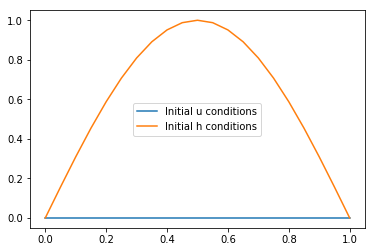

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  6.12323400e-17,   1.56434465e-01,   3.09016994e-01,
          4.53990500e-01,   5.87785252e-01,   7.07106781e-01,
          8.09016994e-01,   8.91006524e-01,   9.51056516e-01,
          9.87688341e-01,   1.00000000e+00,   9.87688341e-01,
          9.51056516e-01,   8.91006524e-01,   8.09016994e-01,
          7.07106781e-01,   5.87785252e-01,   4.53990500e-01,
          3.09016994e-01,   1.56434465e-01,   6.12323400e-17]),
 10,
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]))

In [36]:
initialconditions_cossin(nx, nt)

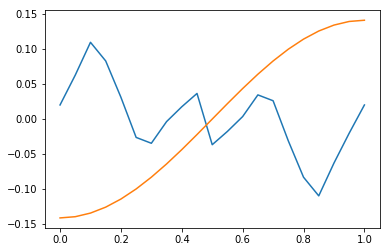

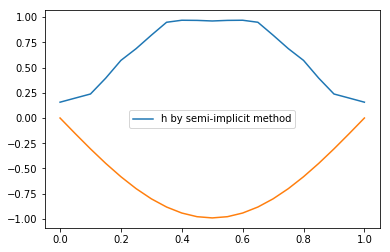

In [46]:
c = 0.1
g = 1
H = 1

dx = 1/nx
dt = (c*dx)/math.sqrt(g*H)

initialu, initialh, midpoint, x = initialconditions_cossin(nx,nt, plot = False)
    
    
uhalf = np.zeros(len(initialu))
    
# for a c-grid the velocity u is stagerred in the x-direction by half
for i in range(0, len(initialu)):
    uhalf[i] = flat_u(i+1/2)
    # therefore uhalf[i] = u_{i + 1/2}
    
# initialize the system
u_semi_implicit = np.zeros_like(uhalf)
h_semi_implicit = np.zeros_like(initialh)
matrix = np.zeros((nx+1,nx+1))

    
uOld = uhalf.copy()
hOld = initialh.copy()

for i in range(nx+1):    
    matrix[i,i] = 1 + c**2/2
    matrix[i, (i-1)%nx] = -(c**2)/4
    matrix[i, (i+1)%nx] = -(c**2)/4
    
for it in range(nt):
    semi_implicit_uvector = np.zeros_like(uOld)

    for i in range(nx + 1):
        semi_implicit_uvector[i] = -math.sqrt(g/H)*c*(hOld[(i + 1)%nx] - hOld[i%nx]) + ((c**2)/4)*uOld[(i+1)%nx] + (1-(c**2)/2)*uOld[i%nx] + ((c**2)/4)*uOld[(i-1)%nx]

    u_semi_implicit = np.linalg.solve(matrix, semi_implicit_uvector)

    semi_implicit_hvector = np.zeros_like(hOld)

    for i in range(nx + 1):
        semi_implicit_hvector[i] = -math.sqrt(H/g)*c*(uOld[i%nx] - uOld[(i-1)%nx]) + ((c**2)/4)*hOld[(i+1)%nx] + (1-(c**2)/2)*hOld[(i)%nx] + ((c**2)/4)*hOld[(i-1)%nx]

    h_semi_implicit = np.linalg.solve(matrix, semi_implicit_hvector)

    uOld = u_semi_implicit.copy()
    hOld = h_semi_implicit.copy()

yu = np.zeros_like(x)
yh = np.zeros_like(x)

for i in range(len(x)):
    yu[i] = math.sin(math.pi*(x[i]-0.5))*math.sin(nt*dt)
    yh[i] = math.cos(math.pi*(x[i]-0.5))*math.cos(nt*dt)
    
plt.clf()
plt.ion()
plt.plot(x, u_semi_implicit, label = 'u by semi-implicit method')
plt.plot(x, yu)
plt.show()

plt.clf()
plt.ion()
plt.plot(x, h_semi_implicit, label = 'h by semi-implicit method')
plt.plot(x,yh)
plt.legend(loc = 'best')
plt.show()